In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.layers import Dropout

In [42]:
# Load the dataset
file_path_train = './input/Google_Stock_Price_Train.csv'
file_path_test = './input/Google_Stock_Price_Test.csv'
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)
print("Train DF")
display(train_df.head())
print("Test DF")
display(test_df.head())

Train DF


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Test DF


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [43]:
print("Train DF")
display(train_df.info())
print("Test DF")
display(test_df.info())

Train DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


None

Test DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


None

In [44]:
# Convert 'Date' to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.set_index('Date',drop=True,inplace=True) # Setting date column as index
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df.set_index('Date',drop=True,inplace=True) # Setting date column as index

In [45]:
display(test_df.head())
print("Train DF")
display(train_df.info())
print("Test DF")
display(test_df.info())

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


Train DF
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


None

Test DF
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


None

In [46]:
#replace the ',' with ''
train_df['Close'] = train_df['Close'].apply(lambda x: str(x).replace(',', '')).astype('float')
test_df['Close'] = test_df['Close'].apply(lambda x: str(x).replace(',', '')).astype('float')
train_df['Volume'] = train_df['Volume'].apply(lambda x: str(x).replace(',', '')).astype('float')
test_df['Volume'] = test_df['Volume'].apply(lambda x: str(x).replace(',', '')).astype('float')

['Open', 'High', 'Low', 'Close']


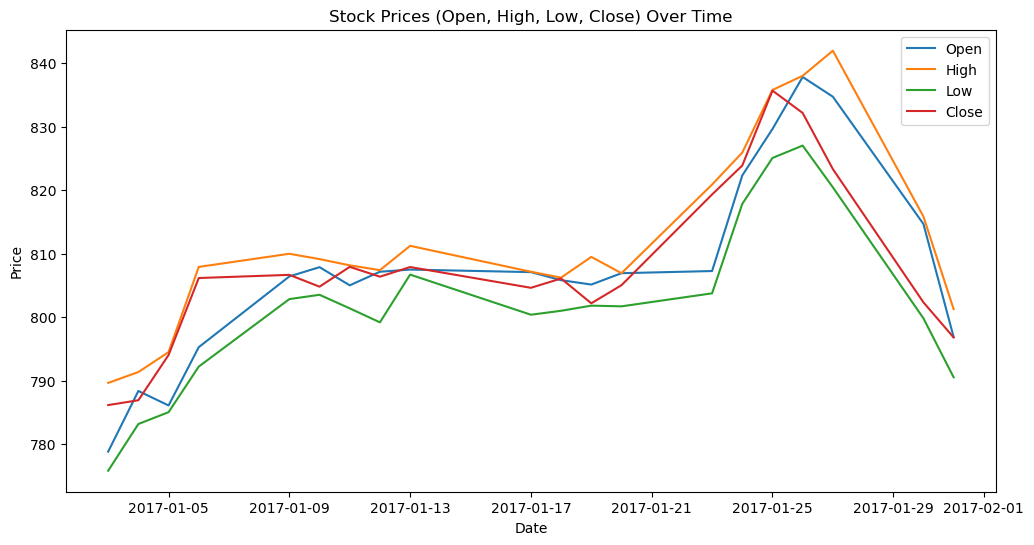

In [47]:
# Check if required columns exist
columns_to_plot = ['Open', 'High', 'Low', 'Close']
available_columns = [col for col in columns_to_plot if col in test_df.columns]
print(available_columns)

# Plot the selected columns
plt.figure(figsize=(12, 6))
for column in available_columns:
    plt.plot(test_df.index, test_df[column], label=column)

# Add title and labels
plt.title('Stock Prices (Open, High, Low, Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

['Open', 'High', 'Low', 'Close']


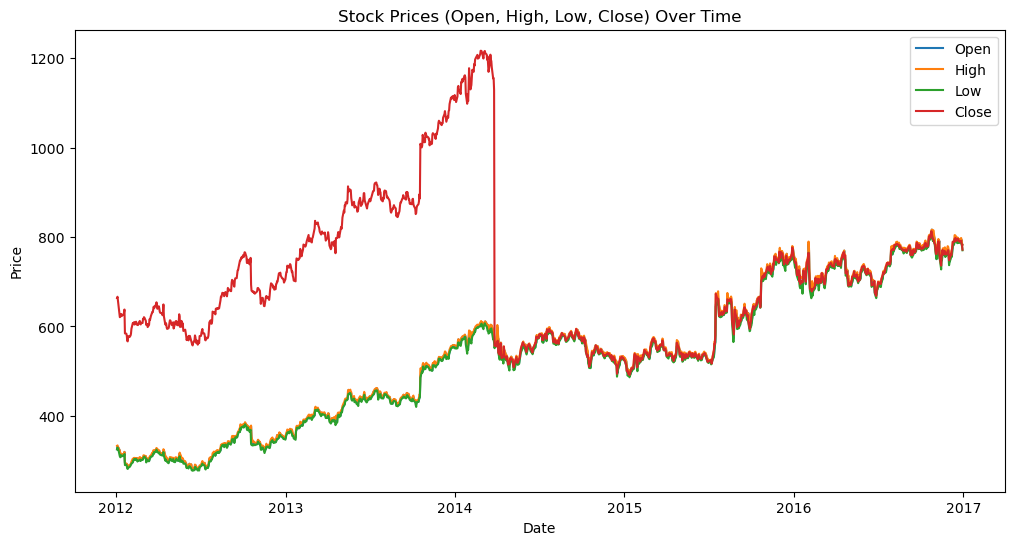

In [48]:
# Check if required columns exist
columns_to_plot = ['Open', 'High', 'Low', 'Close']
available_columns = [col for col in columns_to_plot if col in train_df.columns]
print(available_columns)

# Plot the selected columns
plt.figure(figsize=(12, 6))
for column in available_columns:
    plt.plot(train_df.index, train_df[column], label=column)

# Add title and labels
plt.title('Stock Prices (Open, High, Low, Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

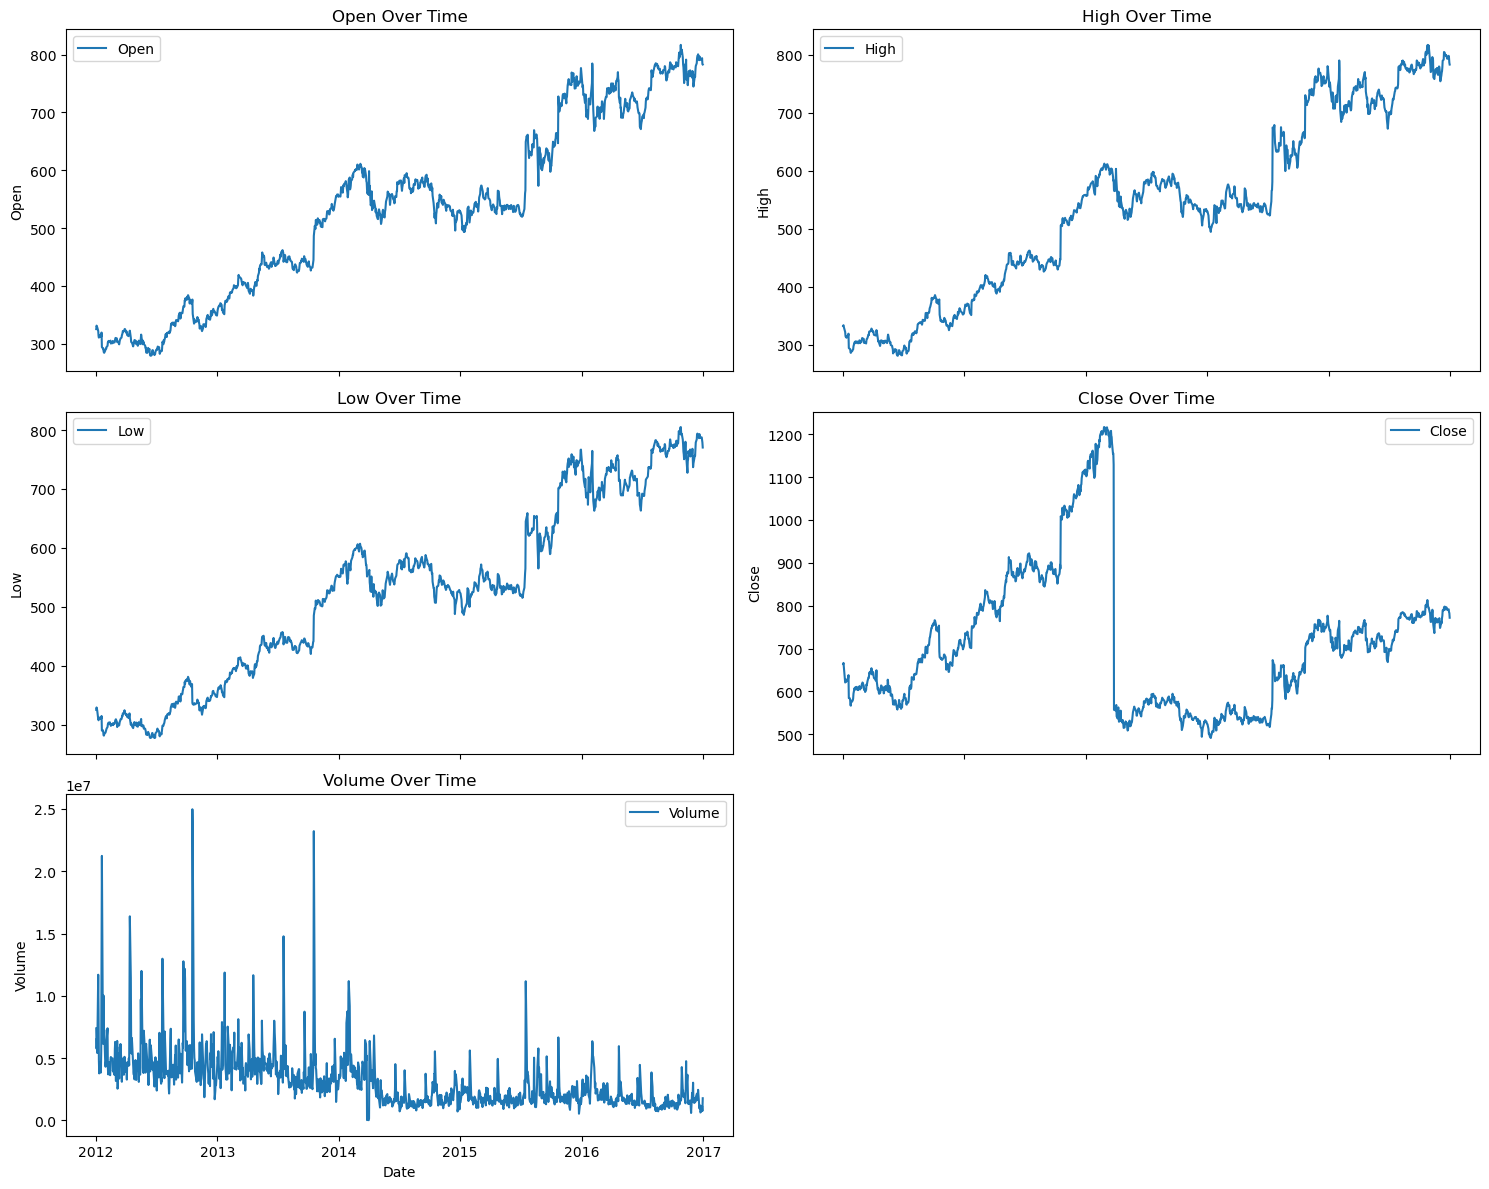

In [49]:
# Calculate number of rows and columns for subplots
columns_to_plot_subplot = [col for col in train_df.columns if col != "Date"]
num_columns = len(train_df.columns)
rows, cols = 3, 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12), sharex=True)
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot_subplot):
    axes[i].plot(train_df.index, train_df[column], label=column)
    axes[i].set_title(f"{column} Over Time")
    axes[i].set_ylabel(column)
    plt.xlabel("Date")
    axes[i].legend()

# Hide any unused subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Set common x-axis label
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [50]:
# Fix GOOG Close Price due to stock split
train_df['Close'] = np.where(train_df['High'] < train_df['Close'], train_df['Close'] / 2.0, train_df['Close'])

['Open', 'High', 'Low', 'Close']


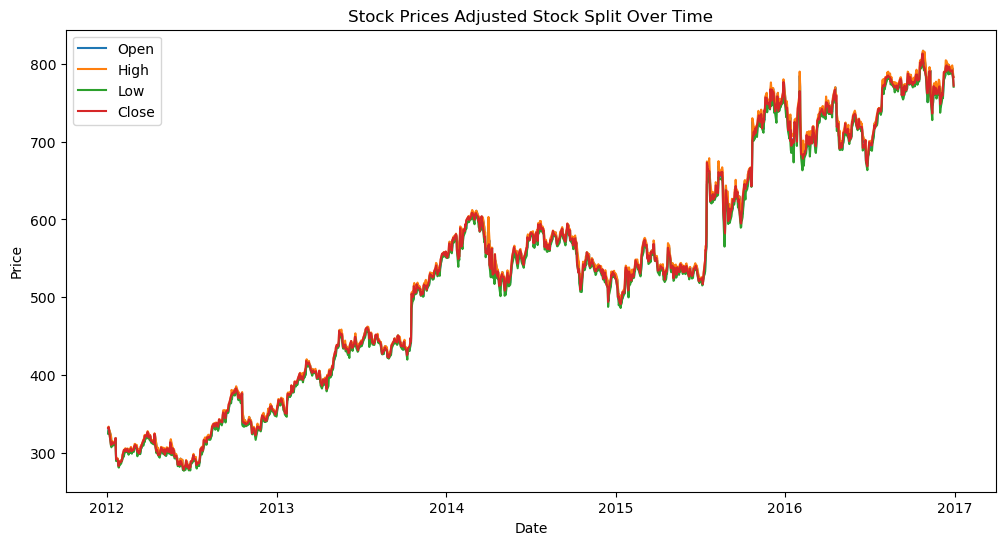

In [51]:
plt.show()
columns_to_plot = ['Open', 'High', 'Low', 'Close']
available_columns = [col for col in columns_to_plot if col in train_df.columns]
print(available_columns)

# Plot the selected columns
plt.figure(figsize=(12, 6))
for column in available_columns:
    plt.plot(train_df.index, train_df[column], label=column)

# Add title and labels
plt.title('Stock Prices Adjusted Stock Split Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
# Reshape data for normalization
scaler = MinMaxScaler()
train_df[train_df.columns] = scaler.fit_transform(train_df)
test_df[train_df.columns] = scaler.fit_transform(test_df)
train_df.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,0.085814,0.096401,0.090449,0.099251,0.295258
2012-01-04,0.097012,0.098344,0.098235,0.101928,0.229936
2012-01-05,0.094334,0.092517,0.094086,0.093282,0.263612
2012-01-06,0.091562,0.088819,0.088006,0.084888,0.216179
2012-01-09,0.079842,0.076718,0.061070,0.059175,0.467797
2012-01-10,0.064328,0.064448,0.056978,0.059802,0.353068
2012-01-11,0.058542,0.060340,0.060956,0.062440,0.192627
2012-01-12,0.065686,0.063589,0.066033,0.065874,0.150441
2012-01-13,0.061091,0.058061,0.060899,0.061533,0.185178


In [14]:
# Split Train data into Train and Validation
split_ratio = 0.8
length_train = round(len(train_df)  * split_ratio)  
length_validation = len(train_df) - length_train
print("Data length :", len(train_df))
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

#for close price
train_data = train_df[:length_train]
validation_data = train_df[length_train:]
display(train_data)
display(validation_data)
train_data.shape, validation_data.shape

Data length : 1258
Train data length : 1006
Validation data lenth : 252


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,0.085814,0.096401,0.090449,0.099251,0.295258
2012-01-04,0.097012,0.098344,0.098235,0.101928,0.229936
2012-01-05,0.094334,0.092517,0.094086,0.093282,0.263612
2012-01-06,0.091562,0.088819,0.088006,0.084888,0.216179
2012-01-09,0.079842,0.076718,0.061070,0.059175,0.467797
...,...,...,...,...,...
2015-12-24,0.875121,0.877995,0.889150,0.878900,0.020797
2015-12-28,0.881390,0.899733,0.894643,0.905306,0.060368
2015-12-29,0.907006,0.931462,0.926674,0.931674,0.070368


,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,0.862936,0.864381,0.860055,0.866623,0.130753
2016-01-05,0.869354,0.879209,0.874034,0.868008,0.077805
2016-01-06,0.838753,0.870207,0.855622,0.869954,0.077657
2016-01-07,0.839330,0.853997,0.836945,0.837709,0.118374
2016-01-08,0.841450,0.844156,0.825466,0.815402,0.097837
...,...,...,...,...,...
2016-12-23,0.952043,0.955292,0.966169,0.956583,0.024650
2016-12-27,0.951633,0.964853,0.966889,0.959652,0.031286
2016-12-28,0.957251,0.958074,0.958441,0.947488,0.045891


((1006, 5), (252, 5))

In [15]:
def create_sequence(dataset, window_time = 40):
  X = []
  y = []

  start_index = 0

  for stop_index in range(window_time,len(dataset)): # Selecting 50 rows at a time
    X.append(dataset.iloc[start_index:stop_index])
    y.append(dataset.iloc[stop_index])
    start_index += 1
  return (np.array(X),np.array(y))

def create_sequence_test(dataset, window_time = 1):
  X = []
  y = []

  start_idx = 0

  for stop_index in range(window_time,len(dataset)): # Selecting 50 rows at a time
    X.append(dataset.iloc[start_idx:stop_index])
    y.append(dataset.iloc[stop_index])
    start_idx += 1
  return (np.array(X),np.array(y))

In [16]:
X_train, y_train = create_sequence(train_data) 
X_valid, y_valid = create_sequence(validation_data)
X_test, y_test = create_sequence_test(test_df) 
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((966, 40, 5), (966, 5), (212, 40, 5), (212, 5), (19, 1, 5), (19, 5))

In [17]:
# Baseline RNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming X_train and y_train are prepared for multiple outputs
# X_train shape: (samples, timesteps, features)
# y_train shape: (samples, 5) for Open, Close, High, Low, Volume

rnn_model = Sequential()

# first RNN layer
rnn_model.add(
    SimpleRNN(
        units=50, 
        activation="tanh", 
        return_sequences=True, 
        input_shape=(X_train.shape[1], X_train.shape[2])
    )
)
rnn_model.add(Dropout(0.2))

# Second RNN layer
rnn_model.add(SimpleRNN(units=50, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.2))

# Third RNN layer
rnn_model.add(Dense(units=5))  # 5 outputs: Open, Close, High, Low, Volume

# Compile the model
rnn_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss="mean_squared_error", 
    metrics=["mean_squared_error"]
)

Epoch 1/3


2024-12-06 18:02:08.905468: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-06 18:02:08.905487: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-06 18:02:08.905494: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-06 18:02:08.905515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-06 18:02:08.905525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Seq

31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 0.1851 - mean_squared_error: 0.1851 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0106 - val_mean_squared_error: 0.0106


In [37]:
loss, mse = rnn_model.evaluate(X_valid, y_valid)
print(f"Validation Loss: {loss}, Validation MSE: {mse}")
history = rnn_model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid), verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Validation Loss: 0.0019036935409530997, Validation MSE: 0.0019036935409530997
Epoch 1/10
 3/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 0.0055 - mean_squared_error: 0.0055


KeyboardInterrupt



In [38]:
valid_predicted = rnn_model.predict(X_valid)
valid_predicted[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


array([[0.77413154, 0.7721048 , 0.80570906, 0.80895126, 0.08852859],
       [0.76395035, 0.77328867, 0.805746  , 0.77630085, 0.06810506],
       [0.78047264, 0.75884235, 0.80271626, 0.78885823, 0.07308823],
       [0.7907094 , 0.81895894, 0.8168899 , 0.81978554, 0.09677608],
       [0.7580714 , 0.7795234 , 0.80962354, 0.7641335 , 0.09512234]],
      dtype=float32)

In [53]:
valid_inverse_predicted = scaler.inverse_transform(valid_predicted)
valid_inverse_predicted

array([[8.2448376e+02, 8.3002649e+02, 8.1706036e+02, 8.2620740e+02,
        1.1253326e+06],
       [8.2388306e+02, 8.3008850e+02, 8.1706226e+02, 8.2459021e+02,
        1.0778009e+06],
       [8.2485791e+02, 8.2933264e+02, 8.1690710e+02, 8.2521210e+02,
        1.0893982e+06],
       ...,
       [8.3153833e+02, 8.3663477e+02, 8.2309991e+02, 8.3140167e+02,
        1.0573959e+06],
       [8.3133777e+02, 8.3577295e+02, 8.2375812e+02, 8.3109674e+02,
        1.0738871e+06],
       [8.3120001e+02, 8.3565271e+02, 8.2247894e+02, 8.3106665e+02,
        1.0949248e+06]], dtype=float32)

In [54]:
df_baseline_summary= pd.concat([train_df.iloc[-212:].copy(),
                          pd.DataFrame(valid_inverse_predicted,columns=['Open Predicted', 'High Predicted', 'Low Predicted', 'Close Predicted', 'Volume Predicted'],
                                       index=train_df.iloc[-212:].index)], axis=1)


In [55]:
df_baseline_summary[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.inverse_transform(df_baseline_summary[['Open', 'High', 'Low', 'Close', 'Volume']])
df_baseline_summary.head()

,Open,High,Low,Close,Volume,Open Predicted,High Predicted,Low Predicted,Close Predicted,Volume Predicted
Date,,,,,,,,,,
2016-03-02,827.089113,832.503537,817.975109,826.932847,1.070393e+06,824.483765,830.026489,817.060364,826.207397,1125332.625
2016-03-03,827.053991,832.449797,817.395030,826.336837,1.101057e+06,823.883057,830.088501,817.062256,824.590210,1077800.875
2016-03-04,826.648995,832.160580,817.395030,826.195018,1.102371e+06,824.857910,829.332642,816.907104,825.212097,1089398.250
2016-03-07,825.761075,831.339828,815.540326,824.736972,1.196786e+06,825.461853,832.477966,817.632935,826.743958,1144527.000
2016-03-08,823.751458,830.919681,815.389001,824.626668,1.112083e+06,823.536194,830.414673,817.260803,823.987488,1140678.250


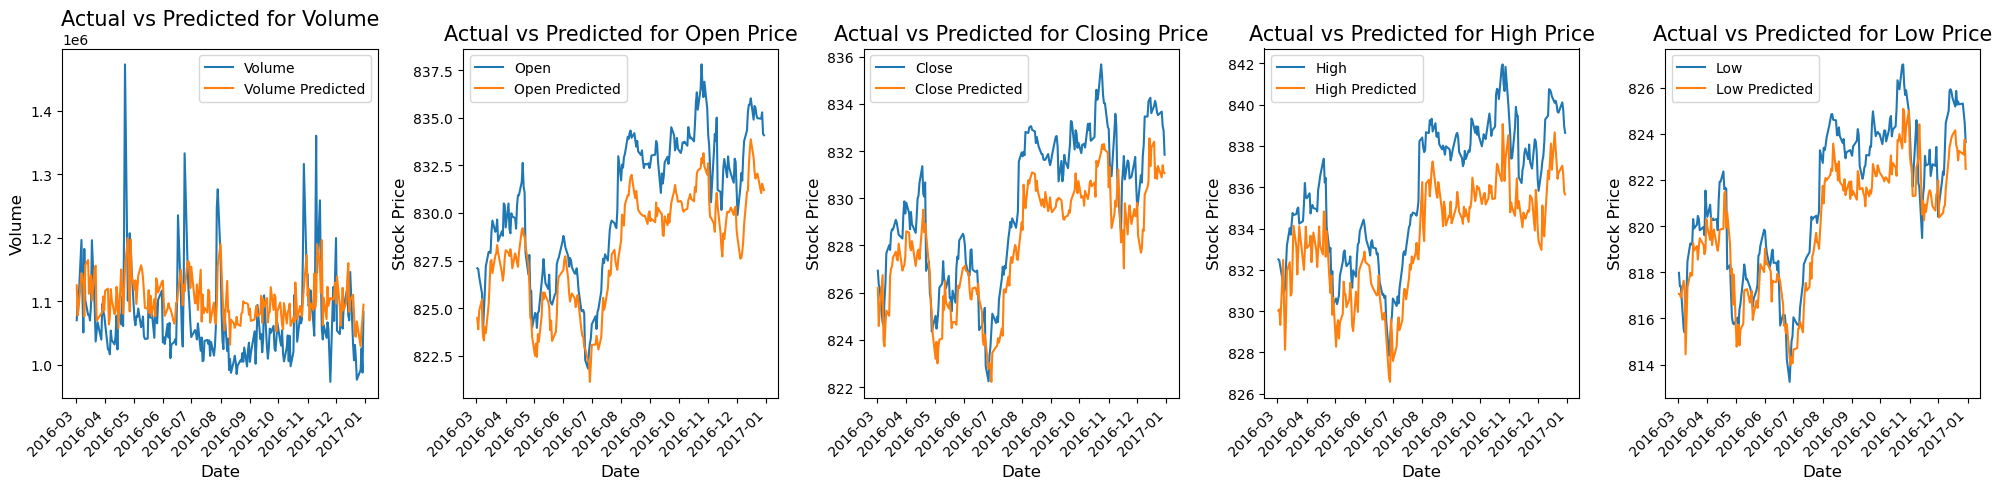

In [56]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

df_baseline_summary[['Volume', 'Volume Predicted']].plot(ax=axes[0])
axes[0].set_title('Actual vs Predicted for Volume', size=15)
axes[0].set_xlabel('Date', size=12)
axes[0].set_ylabel('Volume', size=12)
axes[0].tick_params(axis='x', rotation=45)

df_baseline_summary[['Open', 'Open Predicted']].plot(ax=axes[1])
axes[1].set_title('Actual vs Predicted for Open Price', size=15)
axes[1].set_xlabel('Date', size=12)
axes[1].set_ylabel('Stock Price', size=12)
axes[1].tick_params(axis='x', rotation=45)

df_baseline_summary[['Close', 'Close Predicted']].plot(ax=axes[2])
axes[2].set_title('Actual vs Predicted for Closing Price', size=15)
axes[2].set_xlabel('Date', size=12)
axes[2].set_ylabel('Stock Price', size=12)
axes[2].tick_params(axis='x', rotation=45)

df_baseline_summary[['High', 'High Predicted']].plot(ax=axes[3])
axes[3].set_title('Actual vs Predicted for High Price', size=15)
axes[3].set_xlabel('Date', size=12)
axes[3].set_ylabel('Stock Price', size=12)
axes[3].tick_params(axis='x', rotation=45)

df_baseline_summary[['Low', 'Low Predicted']].plot(ax=axes[4])
axes[4].set_title('Actual vs Predicted for Low Price', size=15)
axes[4].set_xlabel('Date', size=12)
axes[4].set_ylabel('Stock Price', size=12)
axes[4].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [57]:
test_predicted = rnn_model.predict(X_test)
test_predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


array([[0.06309111, 0.01588332, 0.10487077, 0.06247479, 0.15759793],
       [0.06826629, 0.08865859, 0.13780122, 0.09183572, 0.08539776],
       [0.11377537, 0.14049451, 0.16876495, 0.13476193, 0.1423784 ],
       [0.19028011, 0.3734395 , 0.34683916, 0.26978242, 0.24488625],
       [0.1915201 , 0.45267385, 0.3804031 , 0.29694253, 0.20030336],
       [0.17991248, 0.44367808, 0.37192926, 0.28691316, 0.18180543],
       [0.19724731, 0.43258214, 0.36079422, 0.2952611 , 0.17078456],
       [0.17479673, 0.4182647 , 0.36910453, 0.28877196, 0.20285527],
       [0.20569825, 0.4810912 , 0.3856519 , 0.30817044, 0.18274261],
       [0.16766633, 0.4110517 , 0.35977116, 0.27743575, 0.19974431],
       [0.17633572, 0.40285075, 0.3448887 , 0.27777195, 0.19025746],
       [0.17886342, 0.43300515, 0.3623978 , 0.27315542, 0.1469006 ],
       [0.16444984, 0.4057817 , 0.3557187 , 0.2742065 , 0.2376788 ],
       [0.26194465, 0.6054542 , 0.5131416 , 0.39954373, 0.33896902],
       [0.28380322, 0.73641086, 0.

In [58]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[7.8253241e+02, 7.9046100e+02, 7.8117041e+02, 7.8923438e+02,
        1.2860778e+06],
       [7.8283771e+02, 7.9426862e+02, 7.8285675e+02, 7.9068866e+02,
        1.1180462e+06],
       [7.8552277e+02, 7.9698065e+02, 7.8444244e+02, 7.9281482e+02,
        1.2506574e+06],
       [7.9003650e+02, 8.0916840e+02, 7.9356165e+02, 7.9950232e+02,
        1.4892238e+06],
       [7.9010968e+02, 8.1331390e+02, 7.9528046e+02, 8.0084760e+02,
        1.3854660e+06]], dtype=float32)

In [59]:
df_baseline_summary_test= pd.concat([test_df.iloc[-19:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['Open Predicted', 'High Predicted', 'Low Predicted', 'Close Predicted', 'Volume Predicted'],
                                       index=test_df.iloc[-19:].index)], axis=1)

df_baseline_summary_test[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.inverse_transform(df_baseline_summary_test[['Open', 'High', 'Low', 'Close', 'Volume']])
df_baseline_summary_test.head()

,Open,High,Low,Close,Volume,Open Predicted,High Predicted,Low Predicted,Close Predicted,Volume Predicted
Date,,,,,,,,,,
2017-01-04,788.36,791.34,783.16,786.90,1073000.0,782.532410,790.460999,781.170410,789.234375,1286077.750
2017-01-05,786.08,794.48,785.02,794.02,1335200.0,782.837708,794.268616,782.856750,790.688660,1118046.250
2017-01-06,795.26,807.90,792.20,806.15,1640200.0,785.522766,796.980652,784.442444,792.814819,1250657.375
2017-01-09,806.40,809.97,802.83,806.65,1272400.0,790.036499,809.168396,793.561646,799.502319,1489223.750
2017-01-10,807.86,809.13,803.51,804.79,1176800.0,790.109680,813.313904,795.280457,800.847595,1385466.000


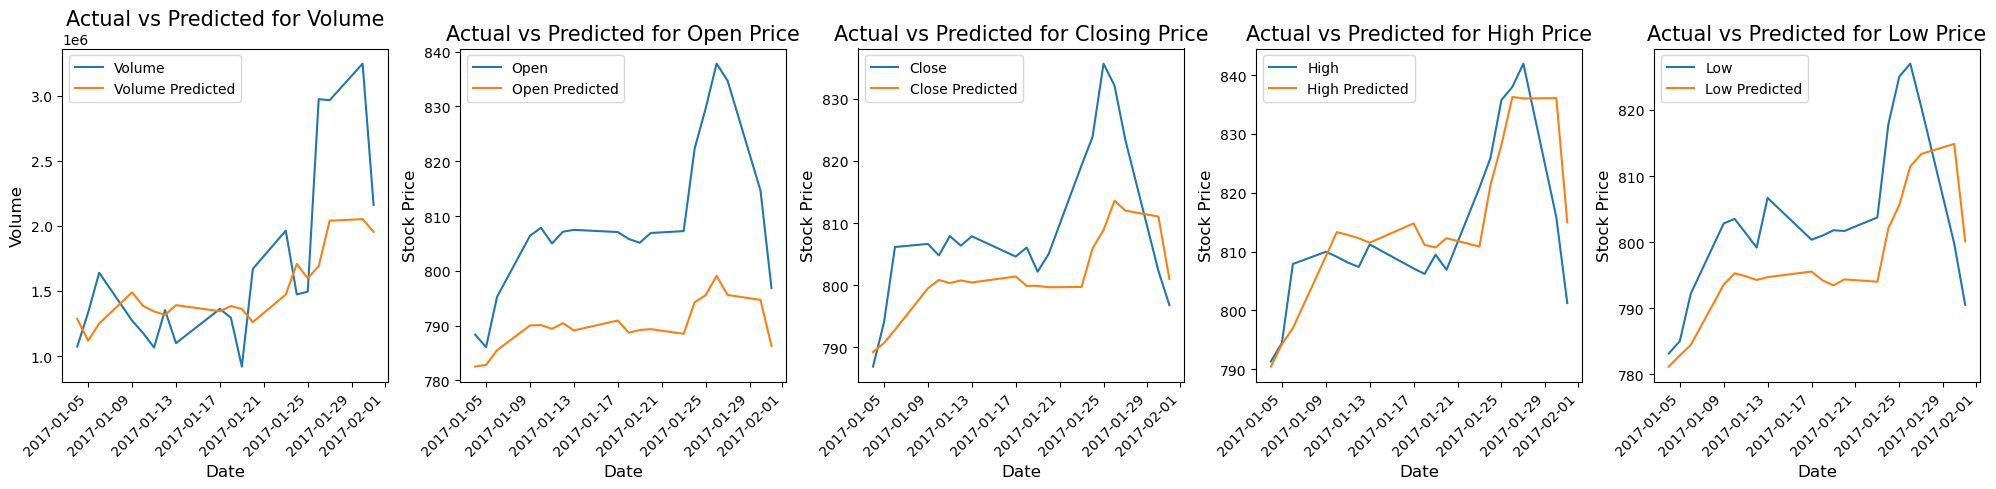

In [60]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

df_baseline_summary_test[['Volume', 'Volume Predicted']].plot(ax=axes[0])
axes[0].set_title('Actual vs Predicted for Volume', size=15)
axes[0].set_xlabel('Date', size=12)
axes[0].set_ylabel('Volume', size=12)
axes[0].tick_params(axis='x', rotation=45)

df_baseline_summary_test[['Open', 'Open Predicted']].plot(ax=axes[1])
axes[1].set_title('Actual vs Predicted for Open Price', size=15)
axes[1].set_xlabel('Date', size=12)
axes[1].set_ylabel('Stock Price', size=12)
axes[1].tick_params(axis='x', rotation=45)

df_baseline_summary_test[['Close', 'Close Predicted']].plot(ax=axes[2])
axes[2].set_title('Actual vs Predicted for Closing Price', size=15)
axes[2].set_xlabel('Date', size=12)
axes[2].set_ylabel('Stock Price', size=12)
axes[2].tick_params(axis='x', rotation=45)

df_baseline_summary_test[['High', 'High Predicted']].plot(ax=axes[3])
axes[3].set_title('Actual vs Predicted for High Price', size=15)
axes[3].set_xlabel('Date', size=12)
axes[3].set_ylabel('Stock Price', size=12)
axes[3].tick_params(axis='x', rotation=45)

df_baseline_summary_test[['Low', 'Low Predicted']].plot(ax=axes[4])
axes[4].set_title('Actual vs Predicted for Low Price', size=15)
axes[4].set_xlabel('Date', size=12)
axes[4].set_ylabel('Stock Price', size=12)
axes[4].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Hyperparameter Tunning RNN

In [85]:
from keras.callbacks import EarlyStopping

# Define hyperparameter ranges
hidden_layer_sizes = [16, 32]
num_layers = [1, 2]
num_epochs = [20,50]  # Number of training epochs
learning_rates = [0.1, 0.01]
from itertools import product

results = []

# Generate all combinations of hyperparameters
hyperparameter_combinations = list(product(hidden_layer_sizes, num_layers, num_epochs, learning_rates))

# Loop through each combination
for hidden_layer_size, layers, epochs, lr in hyperparameter_combinations:
    print(f"Testing combination: hidden_layer_size={hidden_layer_size}, "
          f"layers={layers}, epochs={epochs}, learning_rate={lr}")
    
    # Build the model
    model = Sequential()
    for i in range(layers):
        return_sequences = (i < layers - 1)  # Return sequences except for the last layer
        model.add(SimpleRNN(units=hidden_layer_size, return_sequences=return_sequences, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
    model.add(Dense(5))  # Assuming 1 output
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    # Compile the model
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    # Train the model
    history_train_optm = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1, validation_data = (X_valid, y_valid),callbacks=[early_stopping])
    
    # Evaluate the model
    mse = history_train_optm.history['val_mean_squared_error'][-1]
    result = {
        'hidden_layer_size': hidden_layer_size,
        'num_layers': layers,
        'epochs': epochs,
        'learning_rate': lr,
        'mse': mse
    }
    # Store the result
    print(result)
    results.append(result)

sorted_results = sorted(results, key=lambda x: x['mse'])

print(f"Best Hyperparameters: {sorted_results[0]}")


Testing combination: hidden_layer_size=16, layers=1, epochs=20, learning_rate=0.1
Epoch 1/20


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - loss: 0.4560 - mean_squared_error: 0.4560 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 465ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 457ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0028 -

In [86]:
best_hidden_layer_size = sorted_results[0]['hidden_layer_size']
best_num_layers = sorted_results[0]['num_layers']
best_epochs = sorted_results[0]['epochs']
best_learning_rate = sorted_results[0]['learning_rate']

# Validation Set

In [87]:
final_model = Sequential()
for i in range(best_num_layers):
    return_sequences = (i < best_num_layers - 1)  # Return sequences for intermediate layers
    final_model.add(SimpleRNN(units=best_hidden_layer_size, return_sequences=return_sequences, input_shape=(X_train.shape[1], X_train.shape[2])))
    final_model.add(Dropout(0.2))
final_model.add(Dense(5))  # Assuming 1 output

# Compile the final model
optimizer = Adam(learning_rate=best_learning_rate)
final_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the final model on the entire dataset
final_model.fit(X_train, y_train, epochs=best_epochs, batch_size=32, verbose=1)

Epoch 1/20


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 586ms/step - loss: 0.0830
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 605ms/step - loss: 0.0075
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 551ms/step - loss: 0.0056
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 555ms/step - loss: 0.0035
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 552ms/step - loss: 0.0033
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 549ms/step - loss: 0.0028
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 561ms/step - loss: 0.0027
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - loss: 0.0022
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 551ms/step - loss: 0.0025
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 554ms/step - loss: 0.0022
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 548ms/step - loss: 0.0020
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 548ms/step - loss: 0.0021
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 547ms/step - loss: 0.0018
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 558ms/step - loss: 0.0017
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 556ms/step 

In [88]:
test_loss = final_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.0372
Test Loss (MSE): 0.037227995693683624


In [89]:
valid_predicted_final = final_model.predict(X_valid)
valid_predicted_final[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


array([[0.7739999 , 0.7846397 , 0.7820301 , 0.7716296 , 0.05546976],
       [0.77837133, 0.80709195, 0.7935919 , 0.80817187, 0.0414271 ],
       [0.7798697 , 0.7987107 , 0.79516226, 0.80100566, 0.06125136],
       [0.7766683 , 0.79276097, 0.7945675 , 0.78677535, 0.06023678],
       [0.7685652 , 0.78307146, 0.77284974, 0.7760851 , 0.07999454]],
      dtype=float32)

In [90]:
valid_inverse_predicted_final = scaler.inverse_transform(valid_predicted_final)
valid_inverse_predicted_final[:5]

array([[8.24476013e+02, 8.30682312e+02, 8.15847717e+02, 8.24358826e+02,
        1.04839481e+06],
       [8.24733887e+02, 8.31857056e+02, 8.16439819e+02, 8.26168701e+02,
        1.01571325e+06],
       [8.24822327e+02, 8.31418579e+02, 8.16520264e+02, 8.25813782e+02,
        1.06185025e+06],
       [8.24633423e+02, 8.31107239e+02, 8.16489807e+02, 8.25108948e+02,
        1.05948912e+06],
       [8.24155334e+02, 8.30600281e+02, 8.15377625e+02, 8.24579529e+02,
        1.10547125e+06]], dtype=float32)

In [91]:
df_final_summary = pd.concat([train_df.iloc[-212:].copy(),
                                 pd.DataFrame(valid_inverse_predicted_final,
                                              columns=['Open Predicted', 'High Predicted', 'Low Predicted',
                                                       'Close Predicted', 'Volume Predicted'],
                                              index=train_df.iloc[-212:].index)], axis=1)



In [92]:
# Inversing normalization/scaling 
df_final_summary[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.inverse_transform(
    df_final_summary[['Open', 'High', 'Low', 'Close', 'Volume']])
df_final_summary

,Open,High,Low,Close,Volume,Open Predicted,High Predicted,Low Predicted,Close Predicted,Volume Predicted
Date,,,,,,,,,,
2016-03-02,827.089113,832.503537,817.975109,826.932847,1.070393e+06,824.476013,830.682312,815.847717,824.358826,1.048395e+06
2016-03-03,827.053991,832.449797,817.395030,826.336837,1.101057e+06,824.733887,831.857056,816.439819,826.168701,1.015713e+06
2016-03-04,826.648995,832.160580,817.395030,826.195018,1.102371e+06,824.822327,831.418579,816.520264,825.813782,1.061850e+06
2016-03-07,825.761075,831.339828,815.540326,824.736972,1.196786e+06,824.633423,831.107239,816.489807,825.108948,1.059489e+06
2016-03-08,823.751458,830.919681,815.389001,824.626668,1.112083e+06,824.155334,830.600281,815.377625,824.579529,1.105471e+06
...,...,...,...,...,...,...,...,...,...,...
2016-12-23,834.980511,839.610857,825.277520,833.519544,9.766670e+05,832.313660,838.483276,823.420654,832.171509,9.793182e+05
2016-12-27,834.956365,840.111125,825.314382,833.671559,9.921108e+05,832.291870,838.129395,822.979675,831.516418,9.519858e+05
2016-12-28,835.287826,839.756443,824.881747,833.069061,1.026102e+06,832.555664,838.448608,823.325745,832.028503,9.614656e+05


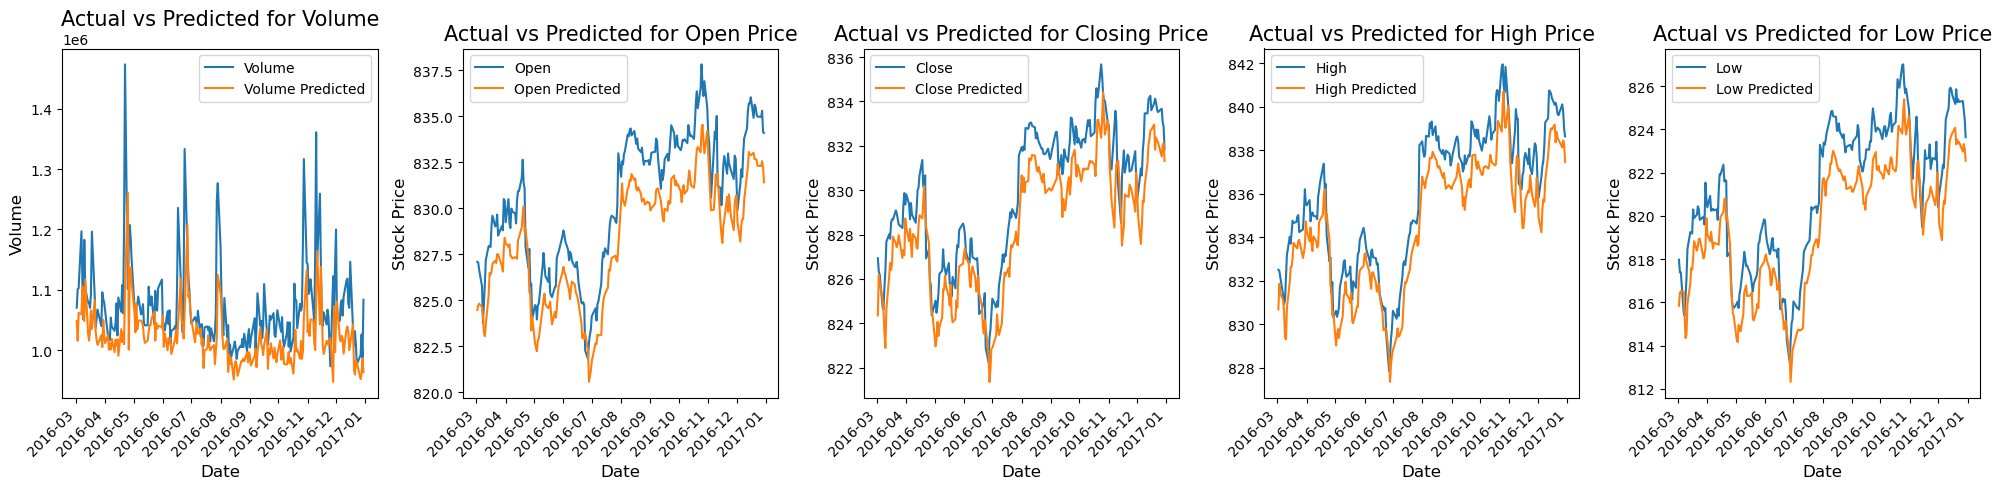

In [93]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

df_final_summary[['Volume', 'Volume Predicted']].plot(ax=axes[0])
axes[0].set_title('Actual vs Predicted for Volume', size=15)
axes[0].set_xlabel('Date', size=12)
axes[0].set_ylabel('Volume', size=12)
axes[0].tick_params(axis='x', rotation=45)

df_final_summary[['Open', 'Open Predicted']].plot(ax=axes[1])
axes[1].set_title('Actual vs Predicted for Open Price', size=15)
axes[1].set_xlabel('Date', size=12)
axes[1].set_ylabel('Stock Price', size=12)
axes[1].tick_params(axis='x', rotation=45)

df_final_summary[['Close', 'Close Predicted']].plot(ax=axes[2])
axes[2].set_title('Actual vs Predicted for Closing Price', size=15)
axes[2].set_xlabel('Date', size=12)
axes[2].set_ylabel('Stock Price', size=12)
axes[2].tick_params(axis='x', rotation=45)

df_final_summary[['High', 'High Predicted']].plot(ax=axes[3])
axes[3].set_title('Actual vs Predicted for High Price', size=15)
axes[3].set_xlabel('Date', size=12)
axes[3].set_ylabel('Stock Price', size=12)
axes[3].tick_params(axis='x', rotation=45)

df_final_summary[['Low', 'Low Predicted']].plot(ax=axes[4])
axes[4].set_title('Actual vs Predicted for Low Price', size=15)
axes[4].set_xlabel('Date', size=12)
axes[4].set_ylabel('Stock Price', size=12)
axes[4].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [94]:
from sklearn.metrics import mean_squared_error
rmse_results_validation = {}

# Iterate through actual-predicted pairs
for actual_col, predicted_col in [('Open', 'Open Predicted'), 
                                  ('Close', 'Close Predicted'),
                                  ('High', 'High Predicted'),
                                  ('Low', 'Low Predicted'),
                                  ('Volume', 'Volume Predicted')]:
    if actual_col in df_final_summary.columns and predicted_col in df_final_summary.columns:
        rmse = np.sqrt(mean_squared_error(df_final_summary[actual_col], df_final_summary[predicted_col]))
        rmse_results_validation[f"{actual_col} vs {predicted_col}"] = rmse

# Display RMSE results
for key, value in rmse_results_validation.items():
    print(f"RMSE for {key}: {value:.4f}")

RMSE for Open vs Open Predicted: 2.3279
RMSE for Close vs Close Predicted: 1.7122
RMSE for High vs High Predicted: 1.5446
RMSE for Low vs Low Predicted: 1.8081
RMSE for Volume vs Volume Predicted: 77178.8029


# Testing Set

In [96]:
test_predicted_final = final_model.predict(X_test)
test_predicted_final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[0.1310558 , 0.12718579, 0.1277511 , 0.15611395, 0.30708295],
       [0.13451569, 0.19964293, 0.19124903, 0.2666698 , 0.13033141],
       [0.18937501, 0.2261478 , 0.22617511, 0.25717464, 0.20026141],
       [0.37295175, 0.3770138 , 0.3736096 , 0.36398655, 0.25026554],
       [0.38081425, 0.47864917, 0.4656443 , 0.5129874 , 0.12172721],
       [0.3643598 , 0.48034048, 0.4646862 , 0.52921766, 0.09372829],
       [0.35985187, 0.45908827, 0.4447675 , 0.4899854 , 0.07002687],
       [0.35513544, 0.4695344 , 0.43882078, 0.50506616, 0.12986942],
       [0.39089328, 0.4984215 , 0.49349147, 0.5382474 , 0.07805692],
       [0.34717295, 0.4677201 , 0.44110194, 0.51229537, 0.13548529],
       [0.33736807, 0.46260375, 0.43877742, 0.5043639 , 0.11988539],
       [0.3599953 , 0.4398487 , 0.43819505, 0.487882  , 0.0483491 ],
       [0.34938905, 0.48249817, 0.45424032, 0.5263684 , 0.21009102],
       [0.54842496, 0.56367874, 0.55323935, 0.521814  , 0.29079986],
       [0.59401333, 0.71285367, 0.

In [97]:
test_inverse_predicted_final = scaler.inverse_transform(test_predicted_final)
test_inverse_predicted_final[:5]


array([[7.8654230e+02, 7.9628436e+02, 7.8234210e+02, 7.9387231e+02,
        1.6339741e+06],
       [7.8674646e+02, 8.0007532e+02, 7.8559387e+02, 7.9934814e+02,
        1.2226204e+06],
       [7.8998315e+02, 8.0146204e+02, 7.8738245e+02, 7.9887787e+02,
        1.3853684e+06],
       [8.0081415e+02, 8.0935541e+02, 7.9493250e+02, 8.0416821e+02,
        1.5017430e+06],
       [8.0127808e+02, 8.1467291e+02, 7.9964563e+02, 8.1154828e+02,
        1.2025958e+06]], dtype=float32)

In [98]:
df_final_summary_test = pd.concat([test_df.iloc[-19:].copy(),
                                      pd.DataFrame(test_inverse_predicted_final,
                                                   columns=['Open Predicted', 'High Predicted', 'Low Predicted',
                                                            'Close Predicted', 'Volume Predicted'],
                                                   index=test_df.iloc[-19:].index)], axis=1)

df_final_summary_test[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.inverse_transform(
    df_final_summary_test[['Open', 'High', 'Low', 'Close', 'Volume']])
df_final_summary_test
# Create subplots with 1 row and 2 columns


,Open,High,Low,Close,Volume,Open Predicted,High Predicted,Low Predicted,Close Predicted,Volume Predicted
Date,,,,,,,,,,
2017-01-04,788.36,791.34,783.16,786.90,1073000.0,786.542297,796.284363,782.342102,793.872314,1633974.125
2017-01-05,786.08,794.48,785.02,794.02,1335200.0,786.746460,800.075317,785.593872,799.348145,1222620.375
2017-01-06,795.26,807.90,792.20,806.15,1640200.0,789.983154,801.462036,787.382446,798.877869,1385368.375
2017-01-09,806.40,809.97,802.83,806.65,1272400.0,800.814148,809.355408,794.932495,804.168213,1501743.000
2017-01-10,807.86,809.13,803.51,804.79,1176800.0,801.278076,814.672913,799.645630,811.548279,1202595.750
2017-01-11,805.00,808.15,801.37,807.91,1065900.0,800.307251,814.761414,799.596558,812.352173,1137433.875
2017-01-12,807.14,807.39,799.17,806.36,1353100.0,800.041260,813.649536,798.576538,810.408997,1082273.625
2017-01-13,807.48,811.22,806.69,807.88,1099200.0,799.762939,814.196045,798.271973,811.155945,1221545.125
2017-01-17,807.08,807.14,800.37,804.61,1362100.0,801.872681,815.707397,801.071716,812.799377,1100961.875


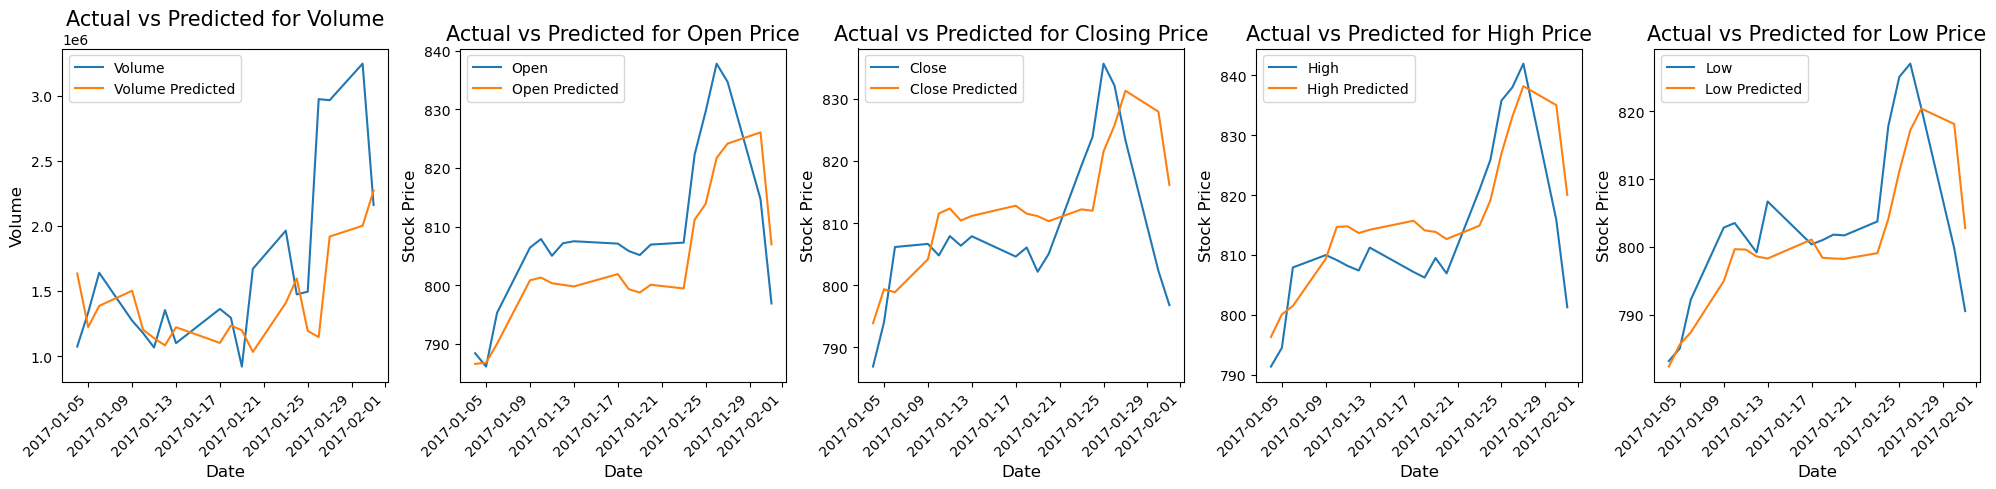

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

df_final_summary_test[['Volume', 'Volume Predicted']].plot(ax=axes[0])
axes[0].set_title('Actual vs Predicted for Volume', size=15)
axes[0].set_xlabel('Date', size=12)
axes[0].set_ylabel('Volume', size=12)
axes[0].tick_params(axis='x', rotation=45)

df_final_summary_test[['Open', 'Open Predicted']].plot(ax=axes[1])
axes[1].set_title('Actual vs Predicted for Open Price', size=15)
axes[1].set_xlabel('Date', size=12)
axes[1].set_ylabel('Stock Price', size=12)
axes[1].tick_params(axis='x', rotation=45)

df_final_summary_test[['Close', 'Close Predicted']].plot(ax=axes[2])
axes[2].set_title('Actual vs Predicted for Closing Price', size=15)
axes[2].set_xlabel('Date', size=12)
axes[2].set_ylabel('Stock Price', size=12)
axes[2].tick_params(axis='x', rotation=45)

df_final_summary_test[['High', 'High Predicted']].plot(ax=axes[3])
axes[3].set_title('Actual vs Predicted for High Price', size=15)
axes[3].set_xlabel('Date', size=12)
axes[3].set_ylabel('Stock Price', size=12)
axes[3].tick_params(axis='x', rotation=45)

df_final_summary_test[['Low', 'Low Predicted']].plot(ax=axes[4])
axes[4].set_title('Actual vs Predicted for Low Price', size=15)
axes[4].set_xlabel('Date', size=12)
axes[4].set_ylabel('Stock Price', size=12)
axes[4].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.savefig('test_optimized.jpg')
plt.show()


In [100]:
rmse_results = {}

# Iterate through actual-predicted pairs
for actual_col, predicted_col in [('Open', 'Open Predicted'), 
                                  ('Close', 'Close Predicted'),
                                  ('High', 'High Predicted'),
                                  ('Low', 'Low Predicted'),
                                  ('Volume', 'Volume Predicted')]:
    if actual_col in df_final_summary_test.columns and predicted_col in df_final_summary_test.columns:
        rmse = np.sqrt(mean_squared_error(df_final_summary_test[actual_col], df_final_summary_test[predicted_col]))
        rmse_results[f"{actual_col} vs {predicted_col}"] = rmse

# Display RMSE results
for key, value in rmse_results.items():
    print(f"RMSE for {key}: {value:.4f}")


RMSE for Open vs Open Predicted: 8.6814
RMSE for Close vs Close Predicted: 10.1599
RMSE for High vs High Predicted: 8.3537
RMSE for Low vs Low Predicted: 7.9209
RMSE for Volume vs Volume Predicted: 628784.1043
